In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error


In [118]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/air_newpcb/"
channel1_mat  = np.zeros((10, 10))  # Low Peak Channel 1
channel2_mat  = np.zeros((10, 10))  #High Peak Channel 1
channel3_mat  = np.zeros((10, 10))  #Low Peak Channel 2
channel4_mat  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    peak1 = np.max(transformed_fft_sig[1340000:1370000])
    peak2 = np.max(transformed_fft_sig[1540000:1570000])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")


['(10, 0)', 'b']
['(70, 30)', 'a']
['(10, 40)', 'b']
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
['(60, 30)', 'b']
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
['(50, 60)', 'a']
['(50, 90)', 'b']
['(70, 90)', 'b']
['(0, 10)', 'b']
['(0, 80)', 'b']
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
['(80, 80)', 'a']
['(60, 20)', 'b']
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
['(30, 50)', 'a']
['(40, 80)', 'b']
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
['(40, 30)', 'b']
['(30, 0)', 'b']
['(60, 80)', 'b']
['(20, 40)', 'b']
['(30, 80)', 'a']
['(90, 80)', 'a']
['(60, 60)', 'b']
['(0, 90)', 'b']
['(70, 60)', 'a']
['(30, 50)', 'b']
['(90, 80)', 'b']
['(

Analytical Model

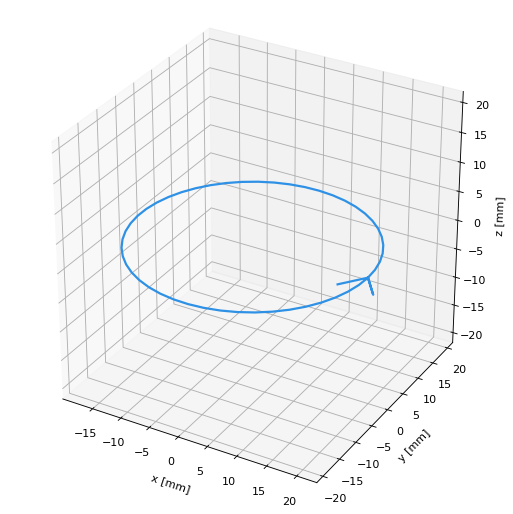

In [108]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((-90.6+10*y, -0.8 ,250 - 83.8 - 10*x))[2]
    return B1

def get_B2(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y - 0.6, -0.8 , 83.8 + 10*x))[2]
    return B2

def get_B3(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y - 0.6, -0.8 , 250 - 83.8 - 10*x))[2]
    return B3

def get_B4(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y - 90.6, -0.8 , 10*x + 83.8))[2]
    return B4

def get_signal_new(channel, coordinates,k):
    if channel == 0:
        BA = get_B1(coordinates)
        BB = get_B3(coordinates)
    elif channel == 1:
        BA = get_B1(coordinates)
        BB = get_B4(coordinates)
    elif channel == 2:
        BA = get_B2(coordinates)
        BB = get_B3(coordinates)
    elif channel == 3:
        BA = get_B2(coordinates)
        BB = get_B4(coordinates)

    return np.abs(BA * BB)*10**k

Plot Fields

In [119]:
def plot_field(matrix):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    Z = matrix
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('RSSI');
    plt.pause(1)
    plt.close(fig)

def plot_model(kparams,m0,m1,m2,m3):
    k = 10.2
    print("HI")
    for i in range(0,4):
        print(i)
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        x = np.arange(0,10,1)
        y = np.arange(0,10,1)
        matrix = np.zeros((10,10))
        for xi in x:
            for yi in y:
                if i==0:
                    pidx=2
                elif i==1:
                    pidx=0
                elif i==2:
                    pidx=3
                elif i==4:
                    pidx=1
                matrix[xi][yi] = np.log10(get_signal_new(i,(xi,yi),kparams[pidx]))
        if i ==0:
            print("First Channel MAE:",mean_absolute_error(matrix,m2))
            matmeas = m2
        elif i == 1:
            print("Second Channel MAE:",mean_absolute_error(matrix,m0))
            matmeas = m0
        elif i == 2:
            print("Third Channel MAE:",mean_absolute_error(matrix,m3))
            matmeas = m3
        elif i == 3:
            print("Fourth Channel MAE:",mean_absolute_error(matrix,m1))
            matmeas = m1
        X, Y = np.meshgrid(x, y)
        Z = matrix
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('RSSI');
        plt.show()
        Z = matmeas
        fig = plt.figure()
        ax = plt.axes(projection='3d') 
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')
        plt.show()

In [110]:
def plot_field(matrix):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    Z = matrix
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('RSSI');
    plt.pause(1)
    plt.close(fig)

In [111]:
k_params = [np.log10(channel1_mat)[0,4] - np.log10(get_signal_new(1,(0,4),0)),
np.log10(channel2_mat)[4,9] - np.log10(get_signal_new(0,(4,9),0)),
np.log10(channel3_mat)[4,0] - np.log10(get_signal_new(3,(4,0),0)),
np.log10(channel4_mat)[9,4] - np.log10(get_signal_new(2,(9,4),0))]

In [120]:
k_params = [np.log10(channel1_mat)[5,5] - np.log10(get_signal_new(1,(5,5),0)),
np.log10(channel2_mat)[5,5] - np.log10(get_signal_new(3,(5,5),0)),
np.log10(channel3_mat)[5,5] - np.log10(get_signal_new(0,(5,5),0)),
np.log10(channel4_mat)[5,5] - np.log10(get_signal_new(2,(5,5),0))]

In [54]:
k_params

[9.675648196086588, 9.507412862760443, 9.85942416441721, 9.499997243641491]

HI
0
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
Pidx 2
First Channel MAE: 0.07496227223336234


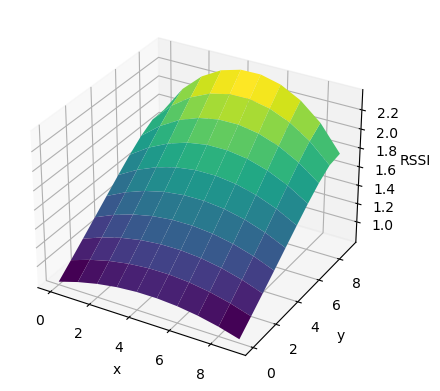

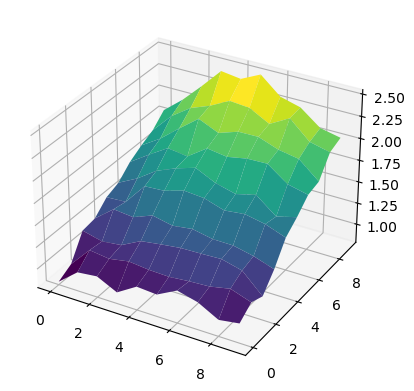

1
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Pidx 0
Second Channel MAE: 0.07606151174699992


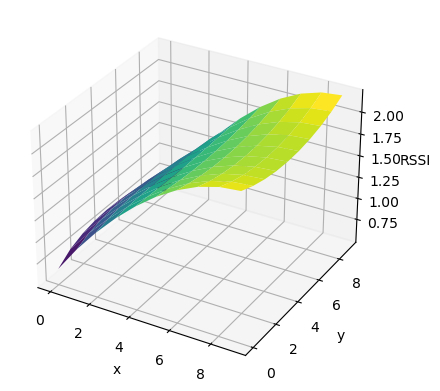

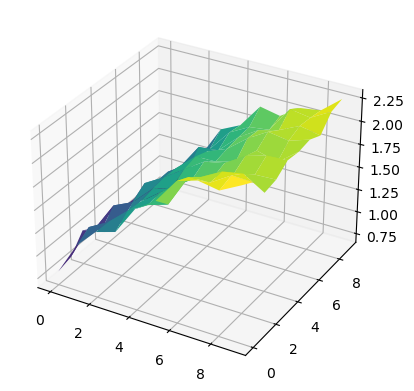

2
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Third Channel MAE: 0.07298651364749055


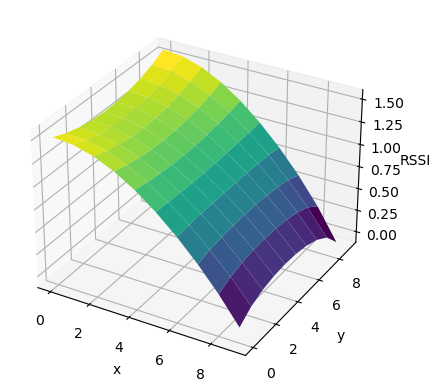

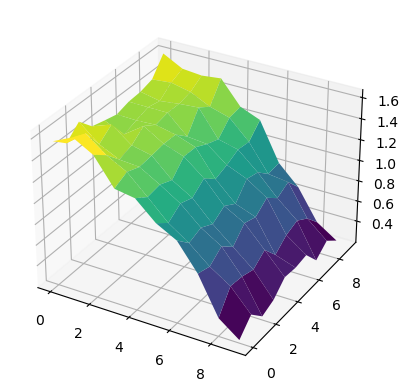

3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Pidx 3
Fourth Channel MAE: 0.2130056976746058


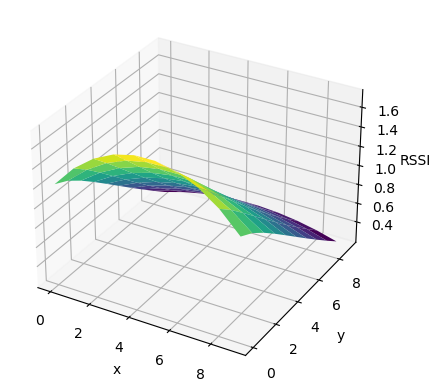

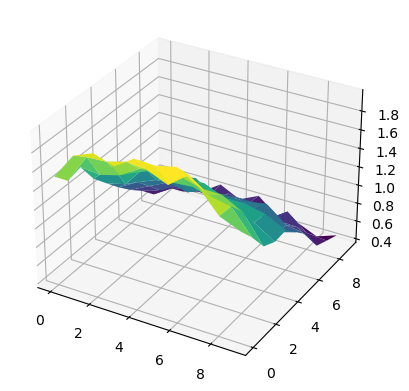

In [121]:
plot_model(k_params,np.log10(channel1_mat),np.log10(channel2_mat),np.log10(channel3_mat),np.log10(channel4_mat))

Plot field for Pork Data

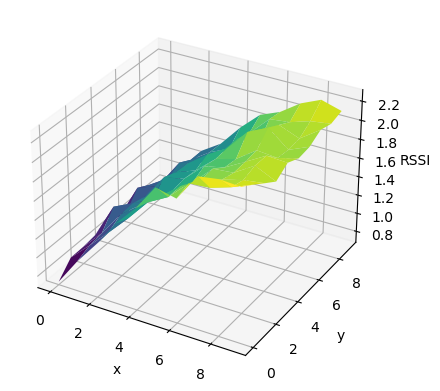

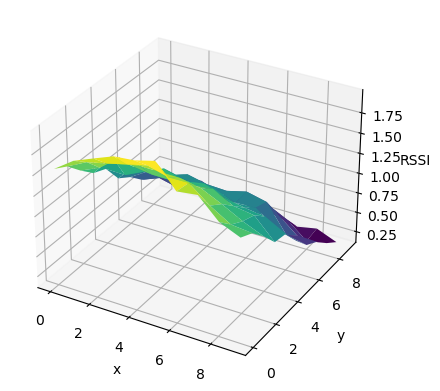

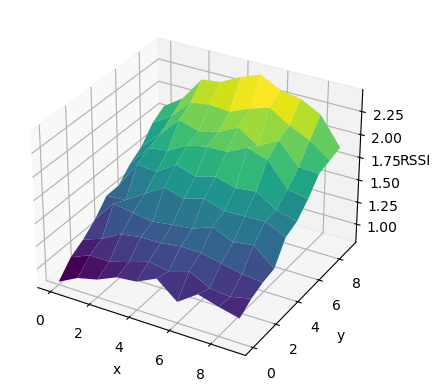

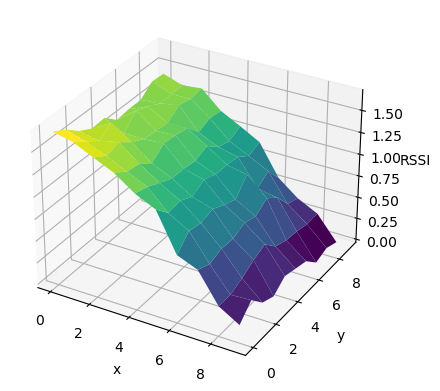

In [47]:
plot_field(np.log10(channel1_mat))
plot_field(np.log10(channel2_mat))
plot_field(np.log10(channel3_mat))
plot_field(np.log10(channel4_mat))

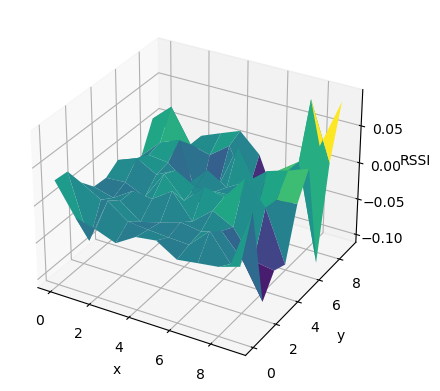

In [115]:
Z = np.log10(channel1_mat)+np.log10(channel4_mat)-np.log10(channel2_mat)-np.log10(channel3_mat)
plot_field(Z)

Analytical Model Plots

Nearest Neighbors Model for Analytical Model

In [14]:
X_Features = []
Y_Labels = []
x = np.arange(0,10,.2)
y = np.arange(0,10,.2)
for x_index in x:
    for y_index in y:
        for chan in range(0,4):
            Y_Labels.append([x_index,y_index])
            feature_ray = []
            for chan in range(0,4):
                if chan == 0:
                    k=10.2
                elif chan == 1:
                    k=10.2
                elif chan == 2:
                    k = 10.2
                elif chan == 3:
                    k = 10.2
                feature_ray.append(get_signal_new(k,(x_index,y_index),10.2))
            X_Features.append(feature_ray)

analytical_modal = KNeighborsRegressor(n_neighbors=2)
analytical_modal.fit(X_Features,Y_Labels)


Processing Data for Channel 0
50
Processing Data for Channel 1
50
Processing Data for Channel 2
50
Processing Data for Channel 3
50


In [59]:
k_params = [np.log10(channel1_mat)[9,4] - np.log10(get_signal_new(2,(9,4),0)),
np.log10(channel2_mat)[4,0] - np.log10(get_signal_new(0,(4,0),0)),
np.log10(channel3_mat)[4,9] - np.log10(get_signal_new(3,(4,9),0)),
np.log10(channel4_mat)[0,4] - np.log10(get_signal_new(1,(0,4),0))]

4

0


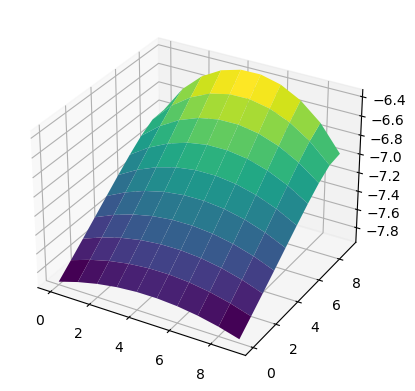

1


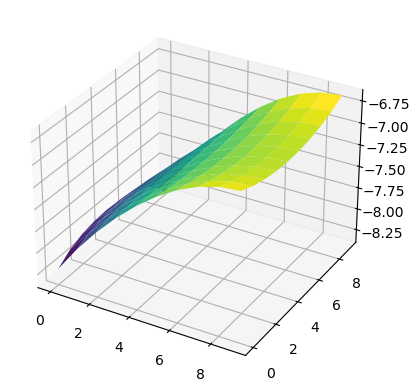

2


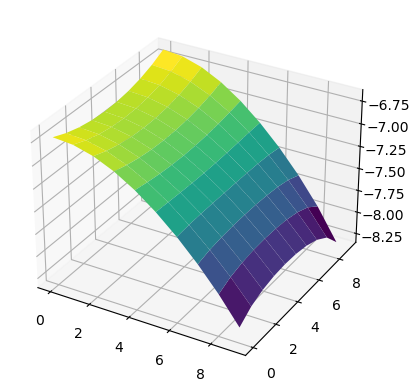

3


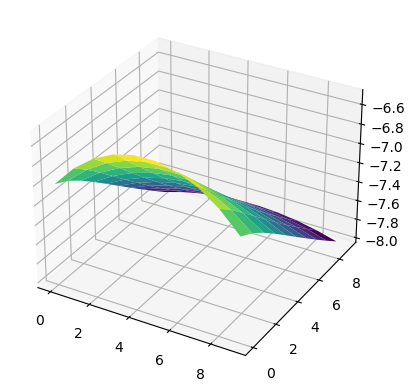

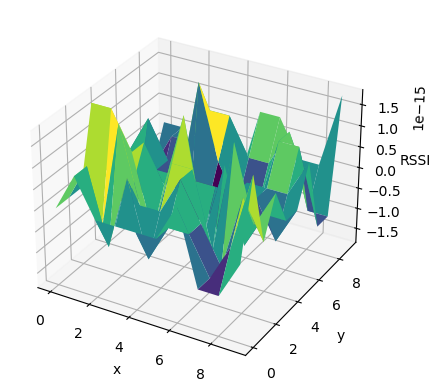

In [62]:
sim_mats = []
for i in range(0,4):
    print(i)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    matrix = np.zeros((10,10))
    for xi in x:
        for yi in y:
            matrix[xi][yi] = np.log10(get_signal_new(i,(xi,yi),1))
    ax.plot_surface(X, Y, matrix, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    plt.show()
    sim_mats.append(matrix)
nkfig = sim_mats[2] + sim_mats[1] - sim_mats[0] - sim_mats[3]
plot_field(nkfig)